DATA VISUALISATION


In [1]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
#Read csv file
df = pd.read_csv('reviews_scores.csv')

df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,restaurant_ids,id_review,caption,relative_date,username,name,cuisine
0,0,0.005796,0.054793,0.939411,1,ChdDSUhNMG9nS0VJQ0FnSURSOTRpbmxnRRAB,Great experience,6 days ago,Sandeep Kaur,Domino's Pizza Flinders St,Fast Food
1,1,0.984013,0.013361,0.002626,1,ChdDSUhNMG9nS0VJQ0FnSURScktPaDV3RRAB,Must be the worst dominos in the world. Pizz...,3 weeks ago,Robert McFarland,Domino's Pizza Flinders St,Fast Food
2,2,0.002001,0.007393,0.990606,1,ChZDSUhNMG9nS0VJQ0FnSURSNUotOUt3EAE,They are so nice and the Food is Perfect !!,3 weeks ago,Patricia Tchialeu,Domino's Pizza Flinders St,Fast Food
3,3,0.003910,0.041748,0.954342,1,ChdDSUhNMG9nS0VJQ0FnSURSNklYTG93RRAB,Staff was friendly and helpful. The deals make...,3 weeks ago,Brent Folan,Domino's Pizza Flinders St,Fast Food
4,4,0.003776,0.144302,0.851922,1,ChZDSUhNMG9nS0VJQ0FnSUNPNXJhd0VREAE,Been coming here for awhile usually happy,a month ago,Johnathan Vanderwerf,Domino's Pizza Flinders St,Fast Food


In [6]:
unique_id_count = df['Id'].nunique()
print(unique_id_count)

14299


In [7]:
df.describe()

,Id,roberta_neg,roberta_neu,roberta_pos,restaurant_ids
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7156.684384,0.177105,0.098887,0.724008,327.956920
std,4131.932438,0.328851,0.153544,0.387164,188.091011
min,0.000000,0.000780,0.004280,0.001761,1.000000
25%,3579.500000,0.001604,0.012045,0.450454,165.000000
50%,7158.000000,0.002894,0.027185,0.965115,329.000000
75%,10735.500000,0.100774,0.103681,0.986288,490.000000
max,14313.000000,0.984861,0.939551,0.994054,652.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              14299 non-null  int64  
 1   roberta_neg     14299 non-null  float64
 2   roberta_neu     14299 non-null  float64
 3   roberta_pos     14299 non-null  float64
 4   restaurant_ids  14299 non-null  int64  
 5   id_review       14299 non-null  object 
 6   caption         14299 non-null  object 
 7   relative_date   14299 non-null  object 
 8   username        14299 non-null  object 
 9   name            14299 non-null  object 
 10  cuisine         14299 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [13]:
# Count the number of reviews per restaurant
review_counts = df['restaurant_ids'].value_counts()

print(review_counts)

93     30
519    30
206    29
280    29
536    29
       ..
547    11
71     10
11     10
491     9
533     9
Name: restaurant_ids, Length: 652, dtype: int64


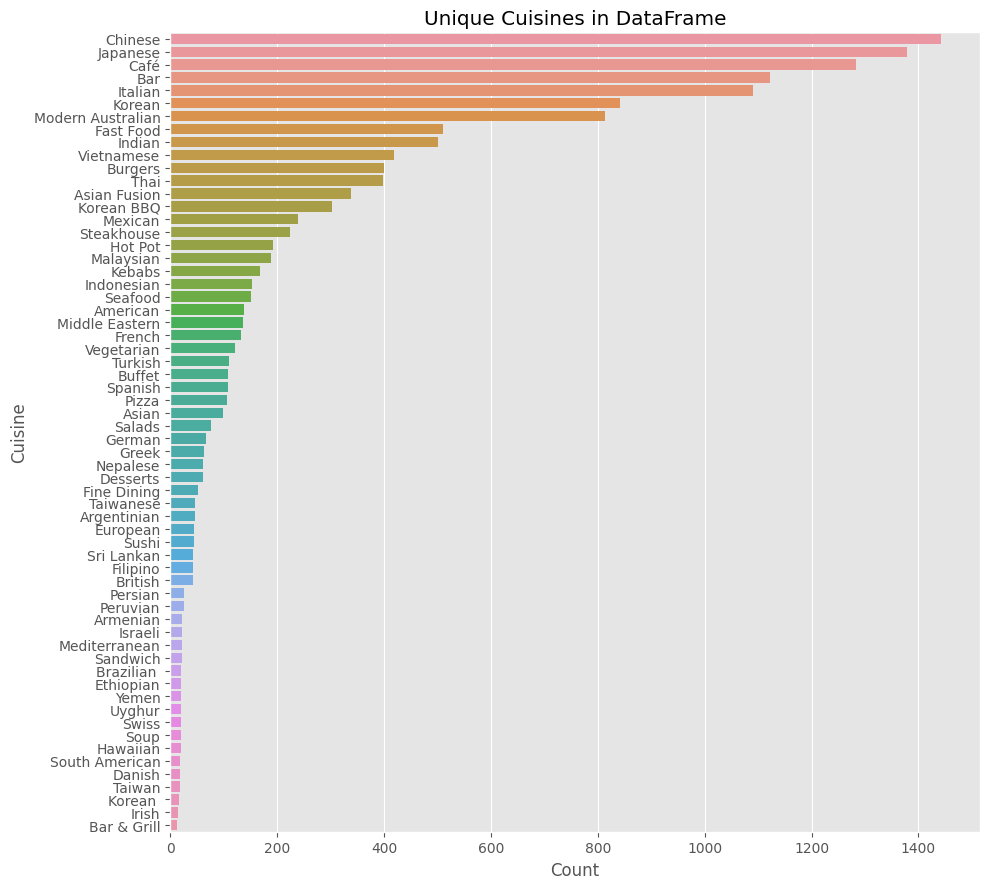

In [18]:
# Count the unique cuisines
cuisine_counts = df['cuisine'].value_counts()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 9))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Different Cuisines in Melbourne CBD')

plt.tight_layout()

# Display the plot
plt.show()

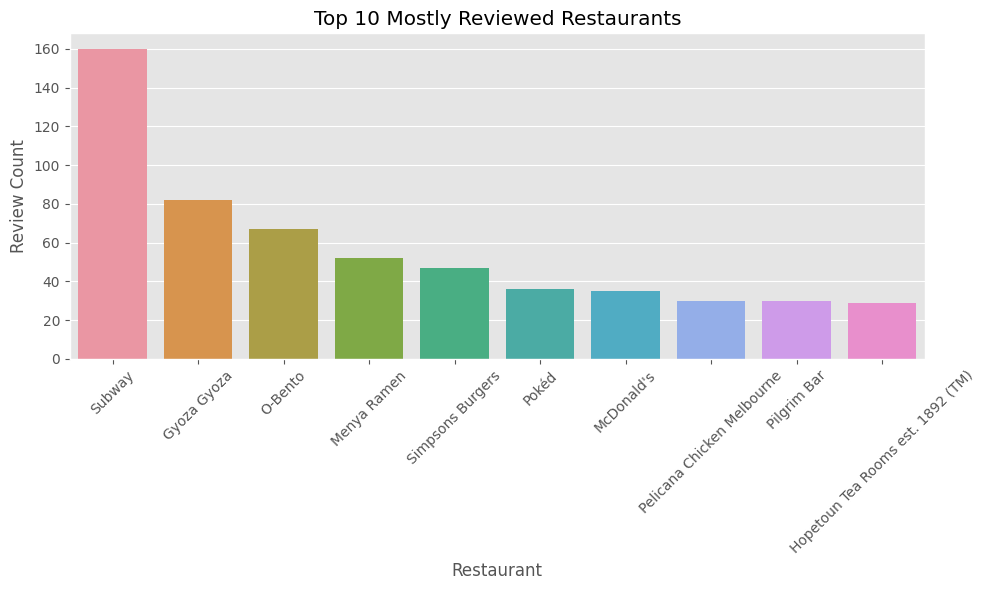

In [41]:
# Count the number of reviews per restaurant
review_counts = df['name'].value_counts().reset_index()
review_counts.columns = ['name', 'review_count']

# Sort DataFrame by the count of reviews in descending order
sorted_df = review_counts.sort_values(by='review_count', ascending=False)

# Select top 10 restaurants with the most reviews
top_10_restaurants = sorted_df.head(10)

# Visualize review counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_restaurants, x='name', y='review_count')

# Add labels and title
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.title('Top 10 Mostly Reviewed Restaurants')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-46-bd9f28b9235d>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_df.groupby('name').sum()


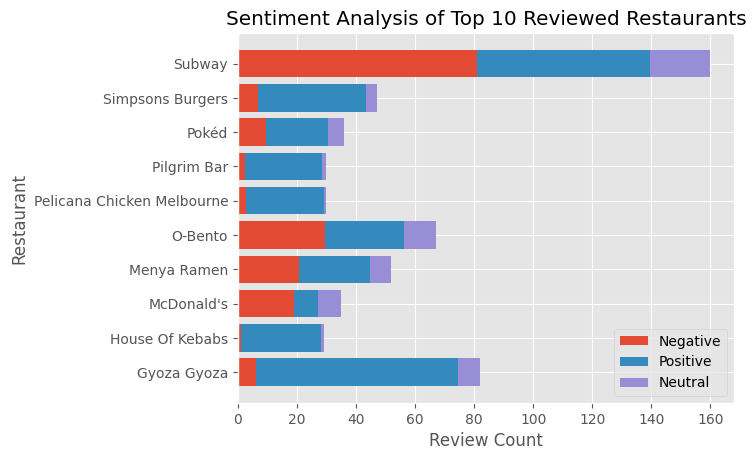

In [46]:
# Counting the number of reviews for each restaurant
review_counts = df['name'].value_counts()
top_10_restaurants = review_counts.nlargest(10)

# Sorting the top 10 restaurants based on the review counts
sorted_restaurants = top_10_restaurants.index.sort_values()

# Filtering the dataframe to include only the top 10 restaurants and sort them
filtered_df = df[df['name'].isin(sorted_restaurants)]

# Grouping the filtered data by restaurant and summing the scores for each category
grouped_data = filtered_df.groupby('name').sum()

# Extracting the scores for each category
neg_scores = grouped_data['roberta_neg'].tolist()
pos_scores = grouped_data['roberta_pos'].tolist()
neu_scores = grouped_data['roberta_neu'].tolist()

# Creating an array for the y-axis positions
y = np.arange(len(grouped_data))

# Creating the horizontal stacked bar chart
plt.barh(y, neg_scores, label='Negative')
plt.barh(y, pos_scores, left=neg_scores, label='Positive')
plt.barh(y, neu_scores, left=np.add(neg_scores, pos_scores), label='Neutral')

# Adding the restaurant names as y-axis labels
plt.yticks(y, grouped_data.index)

plt.xlabel('Review Count')
plt.ylabel('Restaurant')
plt.title('Sentiment Analysis of Top 10 Reviewed Restaurants')
plt.legend()
plt.show()



<ipython-input-48-591e6fb1cc45>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = top_10_restaurants.groupby('name').sum()


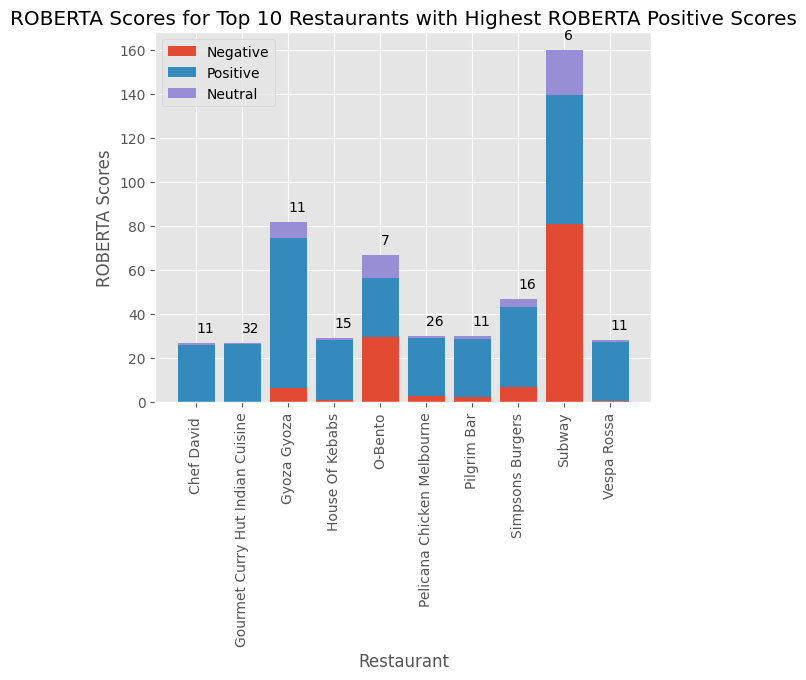

In [48]:
# Grouping the data by restaurant and summing the positive scores
grouped_data = df.groupby('name')['roberta_pos'].sum()

# Sorting the restaurants based on the sum of positive scores
sorted_restaurants = grouped_data.nlargest(10).index

# Filtering the dataframe to include only the top 10 restaurants
top_10_restaurants = df[df['name'].isin(sorted_restaurants)]

# Grouping the filtered data by restaurant and summing the scores for each category
grouped_data = top_10_restaurants.groupby('name').sum()

# Extracting the scores for each category
neg_scores = grouped_data['roberta_neg'].tolist()
pos_scores = grouped_data['roberta_pos'].tolist()
neu_scores = grouped_data['roberta_neu'].tolist()

# Creating an array for the x-axis positions
x = np.arange(len(grouped_data))

# Creating the stacked bar chart
plt.bar(x, neg_scores, label='Negative')
plt.bar(x, pos_scores, bottom=neg_scores, label='Positive')
plt.bar(x, neu_scores, bottom=np.add(neg_scores, pos_scores), label='Neutral')

# Adding the number of restaurants above each bar
for i, num in enumerate(grouped_data.index):
    plt.text(i, sum([pos_scores[i], neg_scores[i], neu_scores[i]])+5, str(len(num)))

# Adding the restaurant names as x-axis labels
plt.xticks(x, grouped_data.index, rotation=90)

plt.xlabel('Restaurant')
plt.ylabel('ROBERTA Scores')
plt.title('ROBERTA Scores for Top 10 Restaurants with Highest ROBERTA Positive Scores')
plt.legend()
plt.show()